In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/Shareddrives/Tree of Life Project"

'BTT Presentation.gslides'
'Copy of Project Brief and Workplan Assignment_Fall 2025 AI Studio.pdf'
'Feature Engg- Naman.gdoc'
'TOLCC Break Through Tech Dataset.xlsx'
 TOL_project.ipynb


In [3]:
import pandas as pd
import numpy as np

file_path = "/content/drive/Shareddrives/Tree of Life Project/TOLCC Break Through Tech Dataset.xlsx"

# Load all sheets
sheets = pd.ExcelFile(file_path).sheet_names
print("Sheets:", sheets)


Sheets: ['Manual CRM Sept. 2024-Mar. 2025', 'Smartsheets CRM April 2025-June', 'Smartsheets June 20,2025-July 9']


In [4]:
# Combine all the Excel sheets into one DataFrame

dfs = []
for sheet in sheets:
    df = pd.read_excel(file_path, sheet_name=sheet)

    # Standardize column names (lowercase, remove spaces)
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

    df['sheet_name'] = sheet
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)

print(data.shape)
print(data.columns)
data.head()

(1964, 17)
Index(['intake_method', 'unnamed:_1',
       'please_be_specific_on_who_sent_you_our_way,_we'd_like_to_thank_them.',
       'age', 'town', 'insurance_carrier', 'appointment_location',
       'appointment_type', 'if_talk_therapy,_specifically_what_type?',
       'appointment_time', 'unnamed:_10', 'unnamed:_11', 'sheet_name',
       'lead_source_category', 'lead_source',
       'referring_provider_name_(if_other,_please_specify)',
       'preferred_appointment_time'],
      dtype='object')


,intake_method,unnamed:_1,"please_be_specific_on_who_sent_you_our_way,_we'd_like_to_thank_them.",age,town,insurance_carrier,appointment_location,appointment_type,"if_talk_therapy,_specifically_what_type?",appointment_time,unnamed:_10,unnamed:_11,sheet_name,lead_source_category,lead_source,"referring_provider_name_(if_other,_please_specify)",preferred_appointment_time
0,Call,Bariatric Doctor,Bariatric Doctor,25-30,Elizabeth,BCBS,Virtual,Talk Therapy,Bariatric Evaluation,Evening (4-8),NaN,NaN,Manual CRM Sept. 2024-Mar. 2025,NaN,NaN,NaN,NaN
1,Call,Family/Friend,Mom,10-15,Summit,United Healthcare,Virtual,Talk Therapy,Individual (minor),Afternoon (12-4),NaN,NaN,Manual CRM Sept. 2024-Mar. 2025,NaN,NaN,NaN,NaN
2,Boom Form,Family/Friend,Friend,20-25,Monroe,BCBS,Freehold,Talk Therapy,Individual (adult),Afternoon (12-4),NaN,NaN,Manual CRM Sept. 2024-Mar. 2025,NaN,NaN,NaN,NaN
3,Boom Form,Family/Friend,NaN,25-30,Ocean,BCBS,Freehold,Talk Therapy,Individual (adult),Afternoon (12-4),NaN,NaN,Manual CRM Sept. 2024-Mar. 2025,NaN,NaN,NaN,NaN
4,Boom Form,Family/Friend,NaN,30-35,Jackson,Aetna,Freehold,Talk Therapy,Individual (adult),Afternoon (12-4),NaN,NaN,Manual CRM Sept. 2024-Mar. 2025,NaN,NaN,NaN,NaN


In [5]:
# Drop unnecessary columns
drop_cols = [
    'unnamed:_1',
    'unnamed:_10',
    'unnamed:_11',
    "please_be_specific_on_who_sent_you_our_way,_we'd_like_to_thank_them.",
    "referring_provider_name_(if_other,_please_specify)",
    "sheet_name"
]

data = data.drop(columns=drop_cols, errors='ignore')

print(data.shape)
print(data.columns)

(1964, 11)
Index(['intake_method', 'age', 'town', 'insurance_carrier',
       'appointment_location', 'appointment_type',
       'if_talk_therapy,_specifically_what_type?', 'appointment_time',
       'lead_source_category', 'lead_source', 'preferred_appointment_time'],
      dtype='object')


In [6]:
# shorten column names for readability

data = data.rename(columns={
    'intake_method': 'intake',
    'insurance_carrier': 'insurance',
    'appointment_location': 'location',
    'appointment_type': 'appt_type',
    'if_talk_therapy,_specifically_what_type?': 'therapy_type',
    'appointment_time': 'appt_time',
    'lead_source_category': 'lead_cat',
    'lead_source': 'lead_source',
    'preferred_appointment_time': 'preferred_time'
})

print(data.columns)


Index(['intake', 'age', 'town', 'insurance', 'location', 'appt_type',
       'therapy_type', 'appt_time', 'lead_cat', 'lead_source',
       'preferred_time'],
      dtype='object')


In [7]:
# Check for null values

data.isnull().sum().sort_values(ascending=False)



,0
preferred_time,1733
lead_source,1731
lead_cat,1378
therapy_type,1034
town,933
insurance,931
age,431
appt_time,415
intake,195
location,184


In [8]:
# dropping 'preferred_time', 'lead_source', 'lead_cat' because 88% of data is missing.
# too sparse to be useful
drop_cols = ['preferred_time', 'lead_source', 'lead_cat']
data = data.drop(columns=drop_cols)

In [9]:
# Converting all values to lowercase to maintain efficiency

data = data.map(lambda x: x.lower() if isinstance(x, str) else x)

In [10]:
for col in ['appt_type', 'insurance']:
  print(col)
  print(data[col].unique())
  print("----")

appt_type
['talk therapy' 'medication management' nan
 'talk therapy\nmedication management' 'updating paperwork'
 'both talk therapy & medication management' 'self-pay talk therapy'
 'talk therapy & medication management' 'updating insurance'
 'self-pay med management']
----
insurance
['bcbs' 'united healthcare' 'aetna' 'cigna' 'meritain' 'highmark'
 'magnacare' 'other' 'umr' 'medicare' 'quest' 'amerihealth' 'optum'
 'oxford' nan 'emblem health' 'surest united healthcare']
----


In [11]:
# Fill missing values of insurance with 'other'
'''     Assumption: All clients are referred using some insurance
        otherwise they are self-pay, which can be confirmed by seeing self-pay in appt_type
'''

data['insurance'] = data['insurance'].fillna('other')

In [12]:
# Converting insurance to 'none' where people are self-paying
# The people who are self paying has 'appt_type' starting with 'self-pay'

mask = data['appt_type'].str.startswith('self-pay', na=False)

# Extract the appt_type part (everything after "self-pay") for the matching records
new_types = data.loc[mask, 'appt_type'].str.replace('self-pay ', '')

# Change the 'insurance' column to "none" for matching records
data.loc[mask, 'insurance'] = 'none'

# Change the 'appt_type' column to the extracted appt_type value for matching records
data.loc[mask, 'appt_type'] = new_types

In [13]:
# Fill missing values (categorical) with "Unknown"
remaining_cat_cols = ['therapy_type', 'town', 'age', 'intake', 'location', 'appt_type']
for col in remaining_cat_cols:
    data[col] = data[col].fillna("unknown")

# Drop rows with missing target
data = data.dropna(subset=['appt_time'])

print(data.isnull().sum())


intake          0
age             0
town            0
insurance       0
location        0
appt_type       0
therapy_type    0
appt_time       0
dtype: int64


In [14]:
# Examining appt_type

print(data['appt_type'].unique())

['talk therapy' 'medication management' 'updating paperwork'
 'both talk therapy & medication management'
 'talk therapy & medication management' 'updating insurance'
 'med management']


In [15]:
# Cleaning appt_type column by
'''
1. Replacing "both talk therapy & medication management" with "talk therapy & med management"
2. Replacing "medication management" with "med management"
3. Replacing "talk therapy & medication management" with "talk therapy & med management"
'''
col_edit = 'appt_type'

data[col_edit] = data[col_edit].str.replace('^both ', '', regex=True)

data[col_edit] = data[col_edit].str.replace('medication management', 'med management', regex=False)

data[col_edit] = data[col_edit].str.replace('talk & medication management', 'talk & med management', regex=False)

# The rest of the values will remain unchanged

In [16]:
# Examining therapy_type

print(data['therapy_type'].unique())

['bariatric evaluation' 'individual (minor)' 'individual (adult)'
 'unknown' 'couples' 'family' '\u200b']


In [17]:
col_edit = 'therapy_type'

data[col_edit] = data[col_edit].replace('\u200b', 'unknown', regex=False)

In [18]:
# Examining appt_time

print(data['appt_time'].unique())

['evening (4-8)' 'afternoon (12-4)' 'morning (9-12)' '5:00 pm' '2:00 pm'
 '3:00 pm' '11:00 am' '12:00 pm' '6:00 pm' '1:00 pm' '9:00 am' '10:00 am'
 '3:40 pm' '5:30 pm' '4:00 pm' '6:30 pm' '9:40 am' '7:00 pm' '9:30 am'
 '12:30 pm' '3:20 pm' '8:00 am' '11:30 am' '1:20 pm' '10:20 am' '7:30 pm'
 '3:30 pm' '1:30 pm']


In [19]:
# Categorizing time appropriately as per 3 bins: morning, afternoon and evening

old_col = 'appt_time'
new_col = 'appt_time_category'

# Defining conditions

# Morning: if it contains "am"
cond_morning = data[old_col].str.contains('am', na=False)

# Afternoon (12-4 PM): covers 12:xx pm and 1:xx pm through 4:xx pm.
cond_afternoon = data[old_col].str.match(r'^(12|[1-4]):\d{2} pm', na=False)

# Evening (5-8 PM): covers 5:xx pm through 8:xx pm.
cond_evening = data[old_col].str.match(r'^[5-8]:\d{2} pm', na=False)

# Categorization
choices = [
    'morning (9-12)',
    'afternoon (12-4)',
    'evening (4-8)'
]

conditions = [
    cond_morning,
    cond_afternoon,
    cond_evening
]

# The default value is the original column value, leaving existing bins unchanged.
default_value = data[old_col]

data[new_col] = np.select(conditions, choices, default=default_value)

In [20]:
# Dropping old time column and renaming new column with the old column name

data.drop(columns=[old_col], inplace=True)
data.rename(columns={new_col: old_col}, inplace=True)

In [21]:
# Examining age

data['age'].unique()

array(['25-30', '10-15', '20-25', '30-35', 'unknown', '15-20', '60-65',
       '40-45', '1-5', '5-10', '50-55', '55-60', '35-40', '65-70',
       '35-40; 35-40', '50-55; 45-50', '25-30; 30-35', '50-55; 50-55',
       '30-35; 40-45', '30-35; 30-35', '45-50; 40-45', '55--60', '75-80',
       '70-75', '80-85', '85-90', '35-40; 40-45', '65-70; 65-70',
       '40-45; 50-55', '55-60; 55-60', '25-20', '45-50; 45-50',
       '60-65; 55-60', '55-60; 60-65', '45-50', '30-35; 25-30',
       '40-45; 35-40', '25-30; 25-30', '40-45; 40-45', '55-60; 50-55',
       '35-40; 30-35', '60-65; 60-65', '25-30; 20-25', '30-35; 35-40',
       '45-50; 50-55'], dtype=object)

In [22]:
# converts data like '25--30' to '25-30' to maintain integrity

data['age'] = data['age'].str.replace(r'-+', '-', regex=True)

In [23]:
# Generalize the multi-age record by splitting and duplicating rows

# Creating new feature which specifies if the person is attending session with someone else or alone
data['duo_attendee'] = np.where(data['age'].str.contains(';'), 1, 0)

# Splitting age entries by ';'
data['age'] = data['age'].str.split('; ')

# Exploding the DataFrame, creating a new record for each age range found in the list
data = data.explode('age', ignore_index=True)

In [24]:
# Converting the age '25-20' to '20-25'

data['age'] = data['age'].replace('25-20', '20-25')

In [25]:
data['town'] = data['town'].replace('penningotn', 'pennington')
data['town'] = data['town'].replace('edgewater park ', 'edgewater park')
data['town'] = data['town'].replace('colombus', 'columbus')

In [26]:
# Confirming continuity of all features before moving forward:

for col in data.columns:
  print(f"Column name is :{col}")
  print(f"Unique values are: {data[col].unique()}")
  print(f"Number of unique values are {data[col].nunique()}")
  print("----")

Column name is :intake
Unique values are: ['call' 'boom form' 'text' 'other' 'waitlist' 'unknown' 'boom' 'virtual']
Number of unique values are 8
----
Column name is :age
Unique values are: ['25-30' '10-15' '20-25' '30-35' 'unknown' '15-20' '60-65' '40-45' '1-5'
 '5-10' '50-55' '55-60' '35-40' '65-70' '45-50' '75-80' '70-75' '80-85'
 '85-90']
Number of unique values are 19
----
Column name is :town
Unique values are: ['elizabeth' 'summit' 'monroe' 'ocean' 'jackson' 'oradell' 'ewing'
 'passaic' 'monmouth beach' 'hamilton' 'freehold' 'princeton junction'
 'plainsboro' 'millstone' 'cream ridge' 'old bridge' 'manalapan' 'matawan'
 'cliffwood' 'mantoloking' 'east brunswick' 'princeton' 'toms river'
 'lawrence township' 'brick' 'morganville' 'long branch' 'clearwater'
 'new brunswick' 'howell' 'south amboy' 'cranbury' 'east windsor'
 'point pleasant' 'allentown' 'kendall park' 'bordentown' 'englishtown'
 'vorhees' 'trenton' 'mount royal' 'hewitt' 'farmingdale' 'hopewell'
 'oceanport' 'spring

In [27]:
#this shows how many morning vs non-morning appointments the dataset has

def map_time_slot(x):
    if "morning" in str(x):
        return 1
    else:
        return 0

data['is_morning'] = data['appt_time'].apply(map_time_slot)

print(data['is_morning'].value_counts())
print(data['is_morning'].value_counts(normalize=True))


is_morning
0    1204
1     402
Name: count, dtype: int64
is_morning
0    0.749689
1    0.250311
Name: proportion, dtype: float64


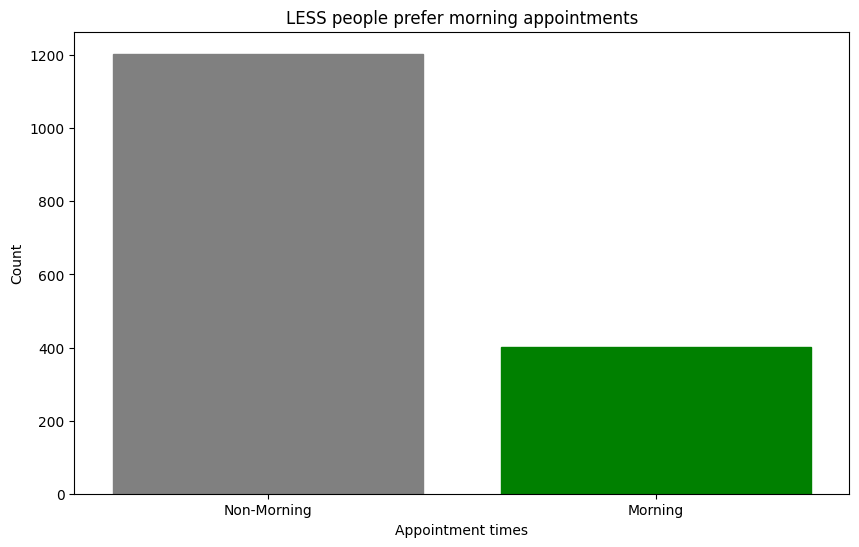

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='is_morning')
for p in ax.patches:
    current_index = ax.patches.index(p)
    if current_index == 0:
        p.set_color('gray')  # Color for '0' (Non-Morning)
    elif current_index == 1:
        p.set_color('green') # Color for '1' (Morning)
plt.title('LESS people prefer morning appointments')
tick_locations = [0, 1]
new_labels = ['Non-Morning', 'Morning']
plt.xticks(tick_locations, new_labels)
plt.xlabel('Appointment times')
plt.ylabel('Count')
plt.show()

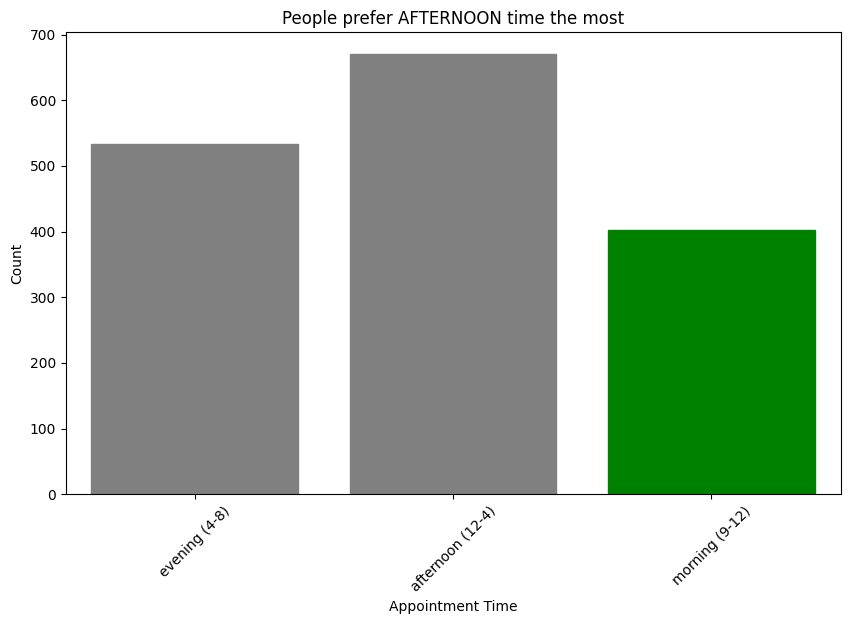

In [29]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='appt_time')
category_labels = [t.get_text() for t in ax.get_xticklabels()]
for i, p in enumerate(ax.patches):

    label = category_labels[i]

    if label == 'morning (9-12)':
        p.set_color('green')
    else:
        p.set_color('gray')
plt.title('People prefer AFTERNOON time the most')
plt.xticks(rotation=45)
plt.xlabel('Appointment Time')
plt.ylabel('Count')
plt.show()

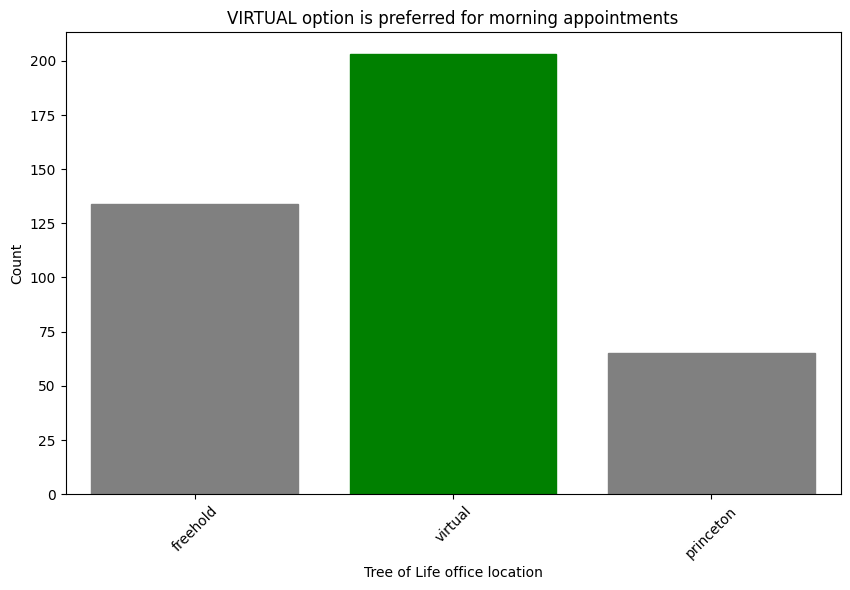

In [30]:
# plot the locations where is_morning is 1
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data[data['is_morning'] == 1], x='location')
category_labels = [t.get_text() for t in ax.get_xticklabels()]
for i, p in enumerate(ax.patches):

    label = category_labels[i]
    if label == 'virtual':
        p.set_color('green')
    else:
        p.set_color('gray')
plt.title('VIRTUAL option is preferred for morning appointments')
plt.xticks(rotation=45)
plt.xlabel('Tree of Life office location')
plt.ylabel('Count')
plt.show()

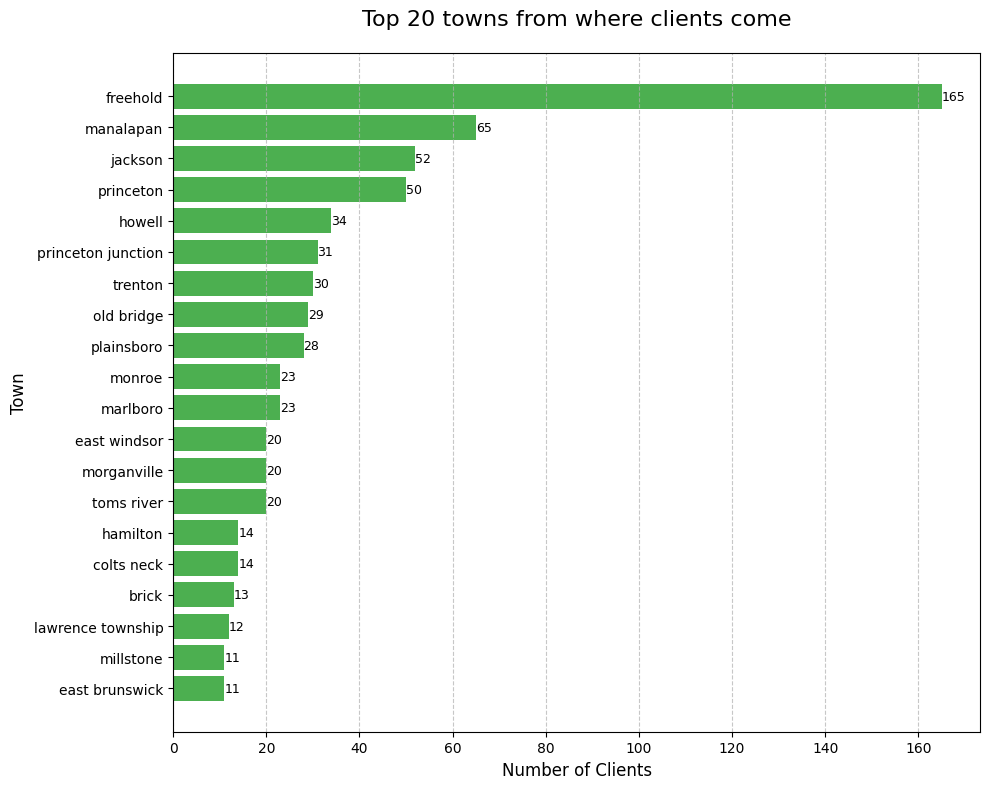

In [31]:
df_filtered = data[data['town'].str.lower() != 'unknown']

town_counts = df_filtered['town'].value_counts()

top_20_towns = town_counts.head(20)

plt.figure(figsize=(10, 8)) # Adjusted size for better visibility of 20 bars

# We plot a horizontal bar chart (barh)
# top_20_towns.index are the town names (Y-axis labels)
# top_20_towns.values are the counts (X-axis values)
bars = plt.barh(top_20_towns.index, top_20_towns.values, color='#4CAF50')

# Add the count value label at the end of each bar
for bar in bars:
    plt.text(
        bar.get_width(), # X position (end of the bar)
        bar.get_y() + bar.get_height()/2, # Y position (center of the bar)
        f'{int(bar.get_width()):,}', # The text to display (the count)
        va='center', # Vertical alignment
        ha='left',   # Horizontal alignment
        fontsize=9,
        color='black'
    )

# Customize the plot appearance
plt.title('Top 20 towns from where clients come', fontsize=16, pad=20)
plt.xlabel('Number of Clients', fontsize=12)
plt.ylabel('Town', fontsize=12)
plt.gca().invert_yaxis() # Display the highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from being cut off

# Display the plot
plt.show()

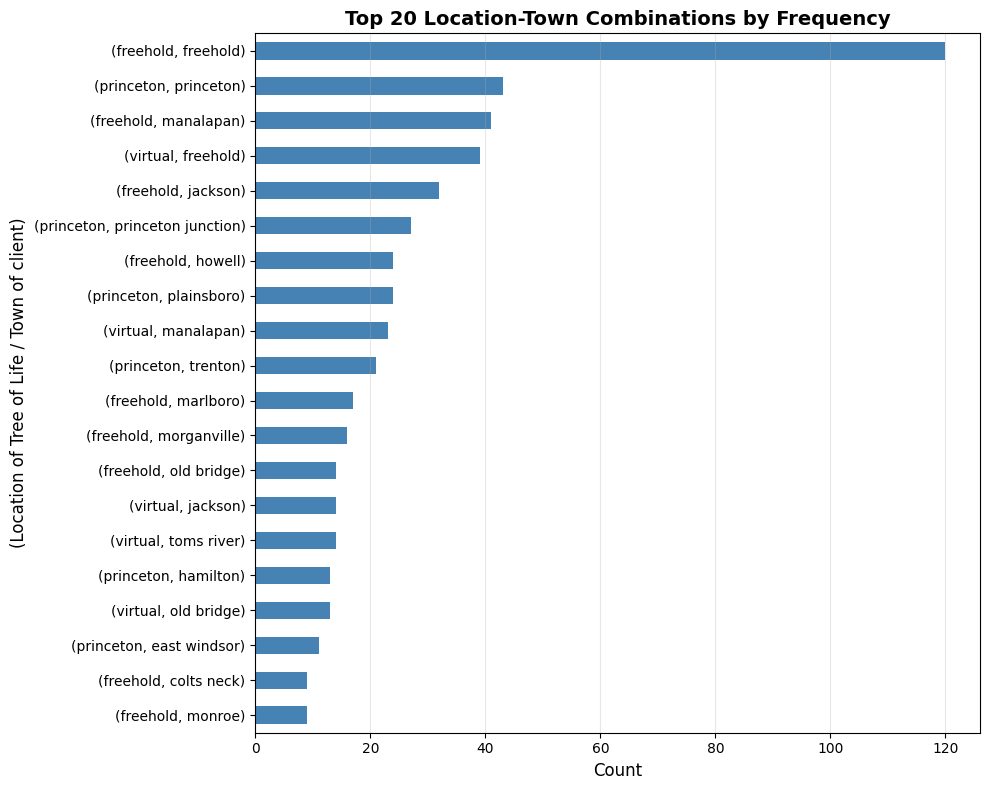

In [32]:
df_not_unknown = data[data['town'] != 'unknown']
counts = df_not_unknown.groupby('location')['town'].value_counts()

top_counts = counts.nlargest(20)

# Create the chart
plt.figure(figsize=(10, 8))
top_counts.plot(kind='barh', color='steelblue')
plt.xlabel('Count', fontsize=12)
plt.ylabel('(Location of Tree of Life / Town of client)', fontsize=12)
plt.title('Top 20 Location-Town Combinations by Frequency', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest values at top
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.show()

In [33]:
town_to_county_map = {
    'elizabeth': 'Union',
    'summit': 'Union',
    # Note: 'Monroe' is ambiguous (Middlesex/Gloucester), selecting Middlesex based on list context
    'monroe': 'Middlesex',
    'ocean': 'Monmouth',
    'jackson': 'Ocean',
    'oradell': 'Bergen',
    'ewing': 'Mercer',
    'passaic': 'Passaic',
    'monmouth beach': 'Monmouth',
    'hamilton': 'Mercer',
    'freehold': 'Monmouth',
    'princeton junction': 'Mercer',
    'plainsboro': 'Middlesex',
    # Note: 'Millstone' is ambiguous (Monmouth/Somerset), selecting Monmouth
    'millstone': 'Monmouth',
    'cream ridge': 'Monmouth',
    'old bridge': 'Middlesex',
    'manalapan': 'Monmouth',
    'matawan': 'Monmouth',
    'cliffwood': 'Monmouth',
    'mantoloking': 'Ocean',
    'east brunswick': 'Middlesex',
    'princeton': 'Mercer',
    'toms river': 'Ocean',
    'lawrence township': 'Mercer',
    'brick': 'Ocean',
    'morganville': 'Monmouth',
    'long branch': 'Monmouth',
    'clearwater': 'out of state',
    'new brunswick': 'Middlesex',
    'howell': 'Monmouth',
    'south amboy': 'Middlesex',
    'cranbury': 'Middlesex',
    'east windsor': 'Mercer',
    'point pleasant': 'Ocean',
    'allentown': 'Monmouth',
    'kendall park': 'Middlesex',
    'bordentown': 'Burlington',
    'englishtown': 'Monmouth',
    'vorhees': 'Camden',
    'trenton': 'Mercer',
    'mount royal': 'Gloucester',
    'hewitt': 'Passaic',
    'farmingdale': 'Monmouth',
    'hopewell': 'Mercer',
    'oceanport': 'Monmouth',
    'spring lake': 'Monmouth',
    'keyport': 'Monmouth',
    'browns mills': 'Burlington',
    'neptune': 'Monmouth',
    'park ridge': 'Bergen',
    'port monmouth': 'Monmouth',
    'middletown': 'Monmouth',
    'fort lee': 'Bergen',
    'titusville': 'Mercer',
    'hazlet': 'Monmouth',
    'wall': 'Monmouth',
    'cherry hill': 'Camden',
    'ringoes': 'Hunterdon',
    'pennington': 'Mercer',
    'marlboro': 'Monmouth',
    'edison': 'Middlesex',
    'columbus': 'Burlington',
    'brielle': 'Monmouth',
    'glen ridge': 'Essex',
    'holmdel': 'Monmouth',
    'unknown': 'Unknown',
    'roselle': 'Union',
    'colts neck': 'Monmouth',
    'atlantic highlands': 'Monmouth',
    'monmouth junction': 'Middlesex',
    'tinton falls': 'Monmouth',
    'red bank': 'Monmouth',
    'hightstown': 'Mercer',
    'bridgewater': 'Somerset',
    'california': 'out of state',
    'mount holly': 'Burlington',
    'pa': 'out of state',
    'fieldsboro': 'Burlington',
    'belle mead': 'Somerset',
    'belmar': 'Monmouth',
    'edgewater park': 'Burlington',
    'wayne': 'Passaic',
    'carteret': 'Middlesex',
    'manahawkin': 'Ocean',
    'bernardsville': 'Somerset',
    'bayville': 'Ocean',
    'north brunswick': 'Middlesex',
    'little silver': 'Monmouth',
    'skillman': 'Somerset',
    'philadelphia': 'out of state',
    'fair lawn': 'Bergen',
    'lakehurst': 'Ocean',
    'new york': 'out of state',
    'jersey city': 'Hudson',
    'forked river': 'Ocean',
    'washington': 'Warren', # Note: 'Washington' can be in multiple counties, selecting Warren
    'hopatcong': 'Sussex',
    'keansburg': 'Monmouth',
    'rumson': 'Monmouth',
    'oakhurst': 'Monmouth',
    'highland park': 'Middlesex',
    'burlington': 'Burlington',
    'asbury park': 'Monmouth',
    'garwood': 'Union',
    'dumont': 'Bergen',
    'lincroft': 'Monmouth',
    'bloomsbury': 'Warren',
    'robbinsville': 'Mercer',
    'hoboken': 'Hudson',
    'fords': 'Middlesex',
    'somerset': 'Somerset',
    'new egypt': 'Ocean',
    'verona': 'Essex',
    'lambertville': 'Hunterdon',
    'hillsborough': 'Somerset',
    'whiting': 'Ocean',
    'union': 'Union',
    'highland lakes': 'Sussex',
    'cedar knolls': 'Morris',
    'south plainfield': 'Middlesex',
    'dover': 'Morris',
    'boonton township': 'Morris',
    'belleville': 'Essex',
    'mays landing': 'Atlantic',
    'towaco': 'Morris',
    'maple shade': 'Burlington',
    'somerville': 'Somerset',
    'spotswood': 'Middlesex',
    'nutley': 'Essex',
    'bridgeton': 'Cumberland',
    'scotch plains': 'Union',
    'franklin park': 'Somerset',
    'brookside': 'Morris',
    'hackensack': 'Bergen',
    'florence': 'Burlington',
    'newton': 'Sussex',
    'helmetta': 'Middlesex',
    'manchester': 'Ocean',
    'pennsauken': 'Camden',
    'saddle brook': 'Bergen',
    'jamesburg': 'Middlesex',
    'langhorne': 'out of state',
    'leonardo': 'Monmouth',
    'staten island': 'out of state', # Removed extra space from list
    'bradley beach': 'Monmouth',
    'tabernacle': 'Burlington',
    'new providence': 'Union',
    'barnegat': 'Ocean',
    'milltown': 'Middlesex',
    'perth amboy': 'Middlesex',
    'manville': 'Somerset',
    'bayonne': 'Hudson',
    'lakewood': 'Ocean',
    'east rutherford': 'Bergen',
    'flemington': 'Hunterdon',
    'montclair': 'Essex',
    'manasquan': 'Monmouth',
    'hammonton': 'Atlantic',
    'mount laurel': 'Burlington',
    'harrison': 'Hudson',
    'ramsey': 'Bergen',
    'cliffside park': 'Bergen',
    'beachwood': 'Ocean',
    'randolph': 'Morris',
    'morristown': 'Morris',
    'woodbridge': 'Middlesex',
    'sea girt': 'Monmouth',
    'parlin': 'Middlesex',
    'cranford': 'Union',
    'union beach': 'Monmouth',
    'east orange': 'Essex',
    'hillside': 'Union',
    'pompton plains': 'Morris',
    'martinsville': 'Somerset',
    'elmer': 'Salem',
    'wrightstown': 'Burlington',
    'allenhurst': 'Monmouth',
    'chester': 'Morris',
    'ny': 'out of state',
    'south river': 'Middlesex',
    'little egg harbor': 'Ocean',
    'bound brook': 'Somerset',
    'galloway': 'Atlantic',
    'springfield': 'Union',
    'budd lake': 'Morris',
    'eatontown': 'Monmouth',
    'little ferry': 'Bergen',
    'sayreville': 'Middlesex',
    'clifton': 'Passaic',
    'lawrenceville': 'Mercer',
    'cookstown': 'Burlington'
}


# Step 3.2: Vectorized Mapping (The fastest way to apply the dictionary lookup)
data['County'] = data['town'].map(town_to_county_map)

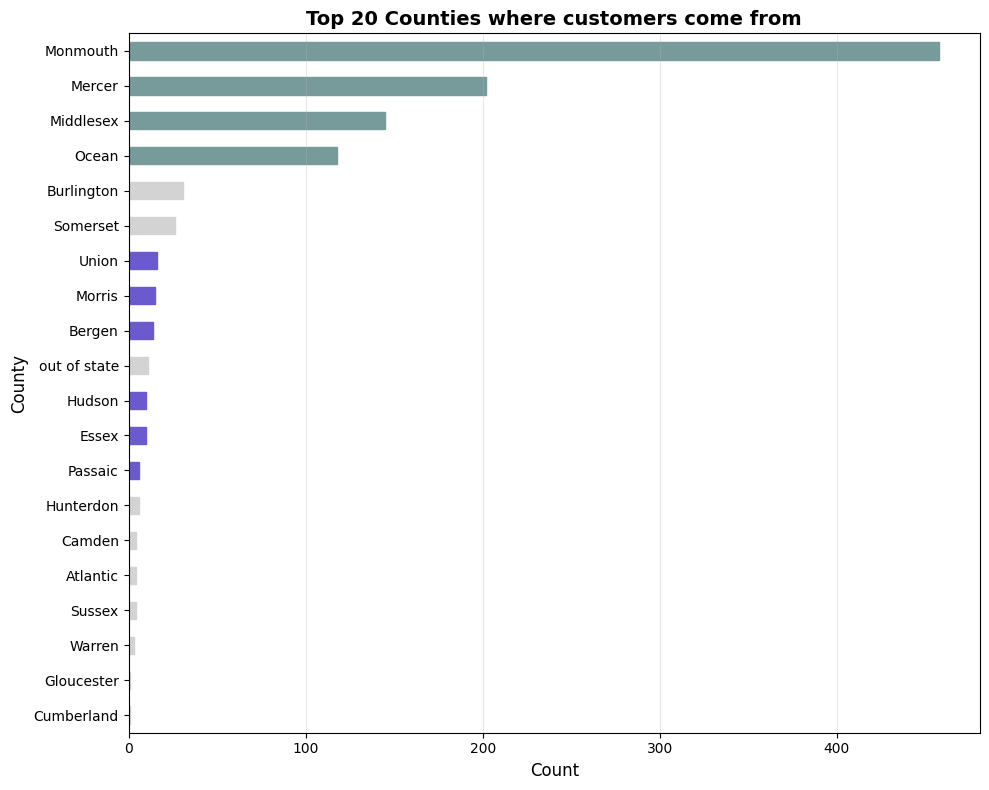

In [34]:
df_county_not_unknown = data[data['County'] != 'Unknown']
counts = df_county_not_unknown['County'].value_counts()

top_counts = counts.nlargest(20)

County_most = ['Monmouth', 'Mercer', 'Middlesex', 'Ocean']

County_cluster = ['Passaic', 'Bergen', 'Morris', 'Essex', 'Hudson', 'Union']

# Create the chart
plt.figure(figsize=(10, 8))
ax = top_counts.plot(kind='barh', color='steelblue')
category_labels = [t.get_text() for t in ax.get_yticklabels()]
for i, p in enumerate(ax.patches):

    label = category_labels[i]
    if label in County_most:
        p.set_color('#779B9B')
    elif label in County_cluster:
        p.set_color('#6A5ACD')
    else:
        p.set_color('#D3D3D3')
plt.xlabel('Count', fontsize=12)
plt.ylabel('County', fontsize=12)
plt.title('Top 20 Counties where customers come from', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest values at top
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.show()

In [35]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time

# Initialize the geocoder. A unique user_agent is required by Nominatim.
# We will use "nj_town_geocoder" for this application.
geolocator = Nominatim(user_agent="nj_town_geocoder")

# Define the exclusion list for town values (case-insensitive check)
EXCLUSION_LIST = {"unknown", "pa", "ny", "new york", "staten island "}

def _fetch_coordinates(town_name: str) -> tuple[float | None, float | None]:
    """
    Helper function to safely fetch latitude and longitude for a single town.
    Applies state context (New Jersey) for better geocoding accuracy.
    """
    try:
        # Construct the query with state context for better accuracy
        query = f"{town_name}, New Jersey, USA"

        # Attempt to geocode
        location = geolocator.geocode(query, timeout=10) # Set a reasonable timeout

        # Be polite to the geocoding service by adding a small delay
        time.sleep(1)

        if location:
            print(f"Geocoded: {town_name} -> ({location.latitude}, {location.longitude})")
            return (location.latitude, location.longitude)
        else:
            print(f"Failed to geocode: {town_name}. No match found.")
            return ("unknown", "unknown")

    except GeocoderTimedOut:
        print(f"Timeout error while geocoding: {town_name}. Skipping.")
        return ("unknown", "unknown")
    except GeocoderServiceError as e:
        print(f"Service error while geocoding: {town_name}. Error: {e}")
        return ("unknown", "unknown")
    except Exception as e:
        print(f"An unexpected error occurred for {town_name}: {e}")
        return ("unknown", "unknown")


def get_town_coordinates(data: pd.DataFrame) -> pd.DataFrame:
    """
    Optimized function to add 'latitude' and 'longitude' features to the DataFrame.
    It performs geocoding only on unique, non-excluded town names and then maps
    the results back, significantly reducing API calls.

    Args:
        data: The input pandas DataFrame containing a 'town' column.

    Returns:
        The DataFrame with the new 'latitude' and 'longitude' columns populated.
    """
    if 'town' not in data.columns:
        print("Error: DataFrame must contain a 'town' column.")
        return data

    # 1. Get unique, non-NaN town names as strings
    # We use .astype(str).str.strip() to normalize input for the map keys
    unique_towns = data['town'].astype(str).str.strip().unique()

    # 2. Filter for towns that require geocoding
    towns_to_geocode = [
        town for town in unique_towns
        if town.lower() not in EXCLUSION_LIST and town.lower() != 'nan'
    ]

    # 3. Create the coordinate dictionary (lookup table)
    # Initialize the map with (None, None) for excluded/NaN values
    town_coords_map = {}

    # Handle excluded towns and string representation of NaNs
    for town in unique_towns:
        if town.lower() in EXCLUSION_LIST or town.lower() == 'nan' or pd.isna(town):
            town_coords_map[town] = ("unknown", "unknown")

    # Geocode only the required unique towns and populate the map
    print(f"Starting geocoding for {len(towns_to_geocode)} unique towns...")
    for town_name in towns_to_geocode:
        town_coords_map[town_name] = _fetch_coordinates(town_name)
    print("Geocoding complete.")

    # 4. Map the coordinates back onto the original DataFrame
    # First, ensure the 'town' column is ready for mapping (string, stripped)
    town_map_key = data['town'].astype(str).str.strip()

    # Map the first element (latitude) and second element (longitude) of the tuple
    data['latitude'] = town_map_key.map(lambda x: town_coords_map.get(x, (None, None))[0])
    data['longitude'] = town_map_key.map(lambda x: town_coords_map.get(x, (None, None))[1])

    return data

df_with_coords = get_town_coordinates(data.copy())

print("\n--- Processed DataFrame with Coordinates ---")
print(df_with_coords.head())

Starting geocoding for 187 unique towns...
Geocoded: elizabeth -> (40.6639916, -74.2107006)
Geocoded: summit -> (40.7182356, -74.3592296)
Geocoded: monroe -> (40.8128777, -74.4423759)
Geocoded: ocean -> (39.977818, -74.3319287)
Geocoded: jackson -> (39.7765048, -74.8623849)
Geocoded: oradell -> (40.9543943, -74.0308504)
Geocoded: ewing -> (40.2688105, -74.8006895)
Geocoded: passaic -> (41.0461864, -74.3177933)
Geocoded: monmouth beach -> (40.3303883, -73.9815262)
Geocoded: hamilton -> (40.2552939, -74.7038183)
Geocoded: freehold -> (40.2601096, -74.2737573)
Geocoded: princeton junction -> (40.3159898, -74.6241189)
Geocoded: plainsboro -> (40.3334409, -74.6004341)
Geocoded: millstone -> (40.4992707, -74.5887679)
Geocoded: cream ridge -> (40.1312275, -74.5350037)
Geocoded: old bridge -> (40.399178, -74.3409036)
Geocoded: manalapan -> (40.2852895, -74.333495)
Geocoded: matawan -> (40.41483, -74.2295891)
Geocoded: cliffwood -> (40.436774, -74.2395893)
Geocoded: mantoloking -> (40.0393597, 

In [36]:
# Create a heatmap leveraging the latitude and longitude variables to determine where the most customers come from
import folium
from folium.plugins import HeatMap

# Drop rows with missing latitude and longitude values
data_geo = df_with_coords.dropna(subset=['latitude', 'longitude'])
data_geo = data_geo[(data_geo['latitude'] != 'unknown') & (data_geo['longitude'] != 'unknown')]

pinpoint_coords = [
    (40.239517, -74.257670),  # Location 1: Freehold
    (40.317265, -74.629201)   # Location 2: Princeton
]

# Create a base map
m = folium.Map(location=[40.0583, -74.4057], zoom_start=8)  # Centered around NJ

# Create a heatmap
heat_data = [[row['latitude'], row['longitude']] for index, row in data_geo.iterrows()]
HeatMap(heat_data, radius=8, max_zoom=13).add_to(m)

for lat, lon in pinpoint_coords:
    folium.Marker(
        location=[lat, lon],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

m.save("Heatmap.html")

In [37]:
data

,intake,age,town,insurance,location,appt_type,therapy_type,appt_time,duo_attendee,is_morning,County
0,call,25-30,elizabeth,bcbs,virtual,talk therapy,bariatric evaluation,evening (4-8),0,0,Union
1,call,10-15,summit,united healthcare,virtual,talk therapy,individual (minor),afternoon (12-4),0,0,Union
2,boom form,20-25,monroe,bcbs,freehold,talk therapy,individual (adult),afternoon (12-4),0,0,Middlesex
3,boom form,25-30,ocean,bcbs,freehold,talk therapy,individual (adult),afternoon (12-4),0,0,Monmouth
4,boom form,30-35,jackson,aetna,freehold,talk therapy,individual (adult),afternoon (12-4),0,0,Ocean
...,...,...,...,...,...,...,...,...,...,...,...
1601,other,unknown,unknown,other,virtual,talk therapy,unknown,afternoon (12-4),0,0,Unknown
1602,boom,unknown,unknown,other,princeton,talk therapy,unknown,morning (9-12),0,1,Unknown
1603,call,unknown,unknown,other,virtual,med management,unknown,morning (9-12),0,1,Unknown
1604,boom,unknown,unknown,other,princeton,talk therapy,unknown,afternoon (12-4),0,0,Unknown
